In [ ]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from gensim.models.word2vec import Word2Vec
nltk.download('omw-1.4')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow import keras 

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/NUS/5002/datasets/Mental-Health-Twitter.csv", index_col=0)
df = data.copy()
df = df.loc[:, ['post_text', 'label']]
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [ ]:
# Text cleaning functions
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    data = re.sub(emoj, '', data)
    return data

def remove_the_at(my_str):
  char = '@'
  result = " ".join(
    filter(
        lambda word: not word.startswith(char), 
        my_str.split()
        )
    )
  my_str = result
  return my_str

def remove_the_http(my_str):
  char = 'http'
  result = " ".join(
    filter(
        lambda word: not word.startswith(char), my_str.split()
        )
    )
  my_str = result
  return my_str

In [ ]:
stopword = stopwords.words("english")
wnl = nltk.WordNetLemmatizer()

def prep(tt):
    tt = tt.lower()
    # Remove punctuations and numbers
    tt = re.sub('[^a-zA-Z]', ' ', tt)
    # Single character removal
    tt = re.sub(r"\s+[a-zA-Z]\s+", ' ', tt)
  
    tt = remove_emojis(tt)
    tt = remove_the_at(tt)
    tt = remove_the_http(tt)
    
    for word in tt.split():
        if word in stopword:
            tt = tt.replace(word, '')
        tt = tt.replace(word, wnl.lemmatize(word))
    # Removing multiple spaces
    tt = re.sub(r'\s+', ' ', tt)
    tt = tt.strip()
    return tt

In [ ]:
X = df['post_text'].apply(prep)
X.head()

0    year since diagnosed wh anxiety depressi day t...
1    sunday need break planning spend ltle tie poss...
2                    awake tired need sleep brain idea
3    rt sewhq retro bear make perfect gift great be...
4    hard say whether packing list making life easi...
Name: post_text, dtype: object

In [ ]:
# t = Tokenizer(oov_token='<UNK>')
# # fit the tokenizer on train documents
# t.fit_on_texts(X)
# t.word_index['<PAD>'] = 0

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on train documents
t.fit_on_texts(X)
t.word_index['<PAD>'] = 0
# Text to sequence
X = t.texts_to_sequences(X)
X

[[23, 239, 497, 171, 221, 280, 12, 567, 11765, 5924, 290, 1940, 239],
 [1077, 22, 512, 3509, 1120, 1789, 513, 762],
 [1225, 583, 22, 112, 475, 367],
 [3,
  7705,
  5925,
  1476,
  25,
  526,
  1168,
  94,
  7706,
  6,
  11766,
  2814,
  11767,
  584,
  1304,
  2],
 [151, 15, 2288, 4876, 865, 363, 35, 1305, 11768, 37, 46, 22, 4877, 221],
 [363, 4876, 146, 24, 3510, 4877],
 [171, 387, 1790, 291, 7707, 397, 1941, 540, 4878, 132, 5926, 4877],
 [1375, 5927, 1025, 11769, 87, 11770, 4879, 487, 11771, 7708],
 [1306, 2289, 57, 215, 43, 1078],
 [3,
  11772,
  7709,
  979,
  2290,
  115,
  763,
  866,
  11773,
  11774,
  2,
  2291,
  1026,
  4071,
  2,
  11775],
 [116, 37, 291, 43, 43, 37, 4877],
 [42, 27, 119, 7, 1942, 1079, 11776, 2, 11777],
 [1121, 291, 5928, 11778, 46, 5929],
 [52, 270, 1121, 291, 4072],
 [7710, 221, 5930, 92, 4880],
 [37, 291, 43, 43, 37, 11779, 4881, 43],
 [7711, 1477, 256, 327, 450, 4073, 7712, 1477, 677],
 [4876, 7713, 40, 21],
 [13, 1226, 7714, 585, 271, 26],
 [26, 6, 12

In [ ]:
len(X)

20000

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=36089
Number of Documents=20000


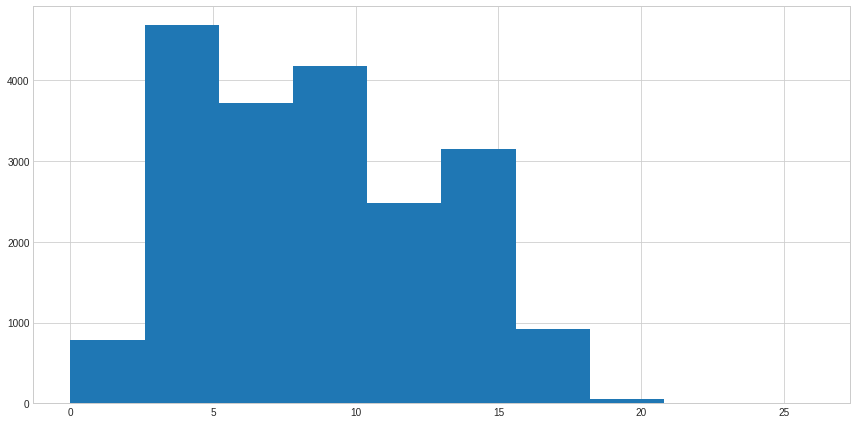

In [ ]:
X_lens = [len(s) for s in X]

fig, ax = plt.subplots(1,figsize=(12, 6))
h = ax.hist(X_lens)

In [ ]:
MAX_SEQUENCE_LENGTH = max(X_lens)
MAX_SEQUENCE_LENGTH

26

In [ ]:
VOCAB_SIZE = len(t.word_index)
VOCAB_SIZE

36089

In [ ]:
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[    0,     0,     0, ...,   290,  1940,   239],
       [    0,     0,     0, ...,  1789,   513,   762],
       [    0,     0,     0, ...,   112,   475,   367],
       ...,
       [    0,     0,     0, ..., 36087,    67,   267],
       [    0,     0,     0, ...,    42,  1164,   254],
       [    0,     0,     0, ...,    66, 36088,  3181]], dtype=int32)

# Model

In [ ]:
import keras.backend as K




from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, train_size=0.9)

In [ ]:
EMBED_SIZE = 50
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()#label_smoothing=0.1

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.30))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.30))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.30))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.30))


model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss=loss, optimizer=Adam, metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 50)            1804450   
                                                                 
 conv1d_3 (Conv1D)           (None, 26, 32)            4832      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 6, 64)            0         
 1D)                                                  

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=200, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
127/127 [==============================] - 5s 11ms/step - loss: 0.5944 - accuracy: 0.6363 - f1_m: 0.5600 - precision_m: 0.6594 - recall_m: 0.5593 - val_loss: 0.3876 - val_accuracy: 0.8161 - val_f1_m: 0.8265 - val_precision_m: 0.7833 - val_recall_m: 0.8773
Epoch 2/200
127/127 [==============================] - 1s 7ms/step - loss: 0.2344 - accuracy: 0.9040 - f1_m: 0.9035 - precision_m: 0.9007 - recall_m: 0.9087 - val_loss: 0.3234 - val_accuracy: 0.8444 - val_f1_m: 0.8508 - val_precision_m: 0.8150 - val_recall_m: 0.8932
Epoch 3/200
127/127 [==============================] - 1s 7ms/step - loss: 0.0694 - accuracy: 0.9761 - f1_m: 0.9760 - precision_m: 0.9731 - recall_m: 0.9794 - val_loss: 0.4703 - val_accuracy: 0.8417 - val_f1_m: 0.8553 - val_precision_m: 0.8376 - val_recall_m: 0.8758
Epoch 4/200
127/127 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.9887 - f1_m: 0.9886 - precision_m: 0.9880 - recall_m: 0.9894 - val_loss: 0.5641 - val_accuracy: 0.8461

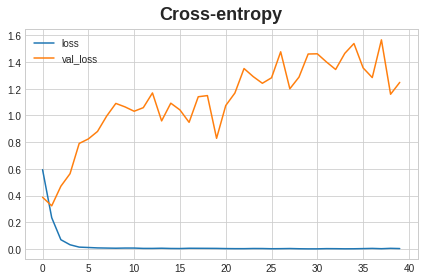

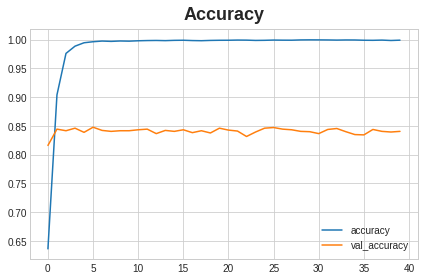

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1: %.2f%%" % (scores[2]*100))


63/63 [==============================] - 0s 3ms/step - loss: 1.3083 - accuracy: 0.8290 - f1_m: 0.8326 - precision_m: 0.7983 - recall_m: 0.8769
Accuracy: 82.90%
F1: 83.26%


In [ ]:
scores

[1.3082704544067383,
 0.8289999961853027,
 0.8326435685157776,
 0.7983419299125671,
 0.8769488334655762]

In [ ]:
# model.save('Binary_Classification_82_CNN.h5')